In [1]:
import pydss
import numpy as np
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool, CustomJS
from bokeh.layouts import gridplot
from bokeh.charts import Bar 
import pandas as pd
import time 
from imp import reload
output_notebook()

Loading BokehJS ...

In [2]:
pydss = reload(pydss)

t_0 = time.time()
sys1 = pydss.pydss('cigre_lv_isolated.json')
sys1.pf()
print('time: {:2.3f}'.format(time.time() - t_0))
s_0 = sys1.pq_3pn

KeyError: '_409_5'

In [ ]:
sys1.V_known[0,0] = 500

In [24]:
nnz = np.argwhere(np.abs(sys1.Y) > 1e-15 ).shape[0]
siz = sys1.Y.shape[0]**2
density = nnz/siz
print(density)

0.16049382716049382


In [23]:
sys1.Y.shape

(72, 72)

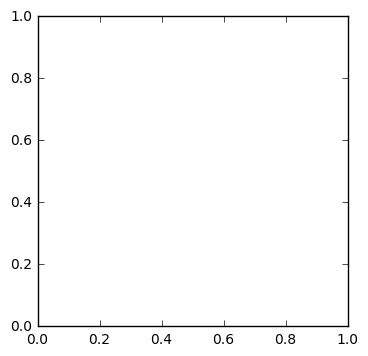

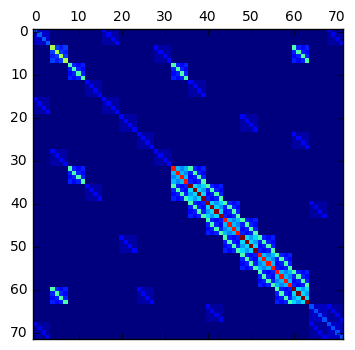

In [18]:
import matplotlib.pyplot as plt
plt.matshow(np.abs(sys1.Y))

plt.show()

In [30]:
sys1.pq_3pn = s_0

sys1.pf()

sys1.get_v()
sys1.get_i()

In [31]:
%timeit sys1.pf()

The slowest run took 7.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 226 µs per loop


In [32]:
sys1.bokeh_tools()

p = figure(width=600, height=800,
           title='European LV Network (CIGRE)', 
           x_range=[-200,200], y_range=[-350, 50])

# lines:
source = ColumnDataSource(sys1.line_data)
lin = p.multi_line(source=source, xs='x_s', ys='y_s', color="red", alpha=0.5, line_width=5)

# buses:
source = ColumnDataSource(sys1.bus_data)
cr = p.circle(source=source, x='x', y='y', size=15, color="navy", alpha=0.5)

p.add_tools(HoverTool(renderers=[lin], tooltips=sys1.line_tooltip))
p.add_tools(HoverTool(renderers=[cr], tooltips=sys1.bus_tooltip))
show(p)


In [35]:
pydss = reload(pydss)

In [36]:
sys1 = pydss.pydss('cigre_lv_isolated.json')
t0 = time.time()
sys1.N_steps = 5000
sys1.pf()
sys1.run()
print('time: {:f}'.format(time.time()-t0))

time: 0.165437


In [37]:
fig = figure(width=600, height=300, title='Currents' )
T = sys1.params_run[0]['T']
I = sys1.params_run[0]['out_cplx_i']
N = sys1.params_run[0].N_outs
#X = sys1.system.X
decim = 1
for it in range(8):
    colors = ['red','green','blue','black']
    fig.line(T[0:N:decim,0],np.abs(I[0:N,it]), color=colors[it%4], line_width=1)
show(fig)

In [38]:
fig = figure(width=600, height=300, title='Temperature')
T = sys1.params_run[0]['T']
T_j_igbt = sys1.params_run[0]['T_j_igbt_abcn']+25
T_sink_1 = sys1.params_run[0]['T_sink']+25
T_sink_2 = sys1.params_run[0]['T_sink']+25
N = sys1.params_run[0].N_outs
#X = sys1.system.X
decim = 1
colors = ['red','green','blue','black']
for it in range(3):    
    fig.line(T[0:N:decim,0],T_j_igbt[0:N,it+0].real, color='red', line_width=1)
for it in range(3):    
    fig.line(T[0:N:decim,0],T_j_igbt[0:N,it+4].real, color='green', line_width=1)
    
fig.line(T[0:N:decim,0],T_sink_1[0:N,0].real, color='red', line_width=1)
fig.line(T[0:N:decim,0],T_sink_2[0:N,0].real, color='green', line_width=1)
show(fig)

In [39]:
fig = figure(width=600, height=300, title='Voltage' )
T = sys1.params_run[0]['T']
V = sys1.params_run[0]['out_cplx_v']
N = sys1.params_run[0].N_outs
#X = sys1.system.X
decim = 1
for it in range(8):
    colors = ['red','green','blue','black']
    fig.line(T[0:N:decim,0],np.abs(V[0:N:decim,it]), color=colors[it%4], line_width=1)
show(fig)

In [40]:
fig = figure(width=600, height=300, title='Angles' )
T = sys1.params_run[0]['T']
V = sys1.params_run[0]['out_cplx_v']
N = sys1.params_run[0].N_outs
#X = sys1.system.X
decim = 1
for it in range(8):
    colors = ['red','green','blue','black']
    fig.line(T[0:N:decim,0],np.angle(V[0:N:decim,it]), color=colors[it%4], line_width=1)
show(fig)

In [41]:
fig = figure(width=600, height=300, title='Volatges (full)' )
decim = 1
for it in range(72):
    colors = ['red','green','blue','black']
    
    fig.line(T[0:N:decim,0],np.abs(V[0:N:decim,it]), color=colors[it%4], line_width=1)
fig.line(T[[0,N],0],[231*1.1,231*1.1],  line_width=3, color='red')
fig.line(T[[0,N],0],[231*1.05,231*1.05],  line_width=2, color='red')
fig.line(T[[0,N],0],[231*0.95,231*0.95],  line_width=2, color='blue')
fig.line(T[[0,N],0],[231*0.9,231*0.9],  line_width=3, color='blue')
fig.line(T[[0,N],0],[231,231],  line_width=2, color='green')
show(fig)

In [44]:
figp = figure(width=600, height=300)
for it in range(6):
    colors = ['red','green','blue','black']
    P=sys1.params_run_cplx[it+72,:].real/1000
    figp.line(T[:,0],P, color=colors[it%3], line_width=1)
show(figp)

AttributeError: 'pydss' object has no attribute 'params_run_cplx'

In [46]:
sys1.params_run


rec.array([ (5000, 0.01, 0.01, array([[ 0.  ],
       [ 0.02],
       [ 0.04],
       ..., 
       [ 0.  ],
       [ 0.  ],
       [ 0.  ]]), array([[  25.00000000+0.j,   25.00000000+0.j,   25.00000000+0.j, ...,
          25.00000000+0.j,   25.00000000+0.j,   25.00000000+0.j],
       [  47.95896447+0.j,   47.23098407+0.j,   46.85158371+0.j, ...,
         102.40277280+0.j,  103.14807817+0.j,   27.58966662+0.j],
       [  66.54341003+0.j,   66.39154196+0.j,   66.58094171+0.j, ...,
          91.92715955+0.j,   91.63061716+0.j,   27.60913670+0.j],
       ..., 
       [   0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j, ...,
           0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j],
       [   0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j, ...,
           0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j],
       [   0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j, ...,
           0.00000000+0.j,    0.00000000+0.j,    0.00000000+0.j]]), array([[ 25.00000000+0.j,  

In [ ]:
fig = figure(width=600, height=300)
fig.line(T[:,0],sys1.system.out[24,:], line_width=1)
show(fig)

In [25]:


sys1.pq_3pn = s_0
sys1.pf()
sys1.get_v()
sys1.get_i()

plt_voltages = figure(width=600, height=300,x_range = [50,-300], y_range = [180,250])
source = ColumnDataSource(sys1.bus_data)
cr = plt_voltages.circle(source=source, x='y', y='v_an', size=15, color="red", alpha=0.5)
plt_voltages.circle(source=source, x='y', y='v_bn', size=15, color="green", alpha=0.5)
plt_voltages.circle(source=source, x='y', y='v_cn', size=15, color="blue", alpha=0.5)
plt_voltages.line([-300, 50],[231*1.05,231*1.05], color='red', line_width=5)
plt_voltages.line([-300, 50],[231*0.90,231*0.90], color='blue', line_width=5)
#plt_voltages.add_tools(HoverTool(renderers=[cr], tooltips=sys1.bus_tooltip))

s = sys1.V_known * np.conj(sys1.I_unknown)
p = s.real/1000

d = {'bus':['N1']*4+['N2']*4,'node':['a','b','c','n']*2,'p':list(p[:,0]), 'pos':range(8)}
#source_powers = pd.DataFrame(d)
source_powers = ColumnDataSource(d)


#plt_powers = Bar(source_powers, values='p',label='bus',  group='node', 
#        title="Avg MPG by ORIGIN, stacked by CYL") #  legend='top_left'
plt_powers = figure(width=600, height=300, y_range = [-100,150], y_axis_label='Powers', x_axis_label='Pos (m)')
plt_powers.circle(source=source_powers, x='pos', y='p', size=15, color="green", alpha=0.5)

def update(load_factor=1.0):

    sys1.pq_3pn = load_factor*s_0

    sys1.pf_eval()
    sys1.get_v()
    sys1.get_i()
    sys1.bokeh_tools()
    s = sys1.system.V_known * np.conj(sys1.system.I_unknown)
    p = s.real/1000

    source.data = sys1.bus_data
    source_powers.data= {'bus':['N1']*4+['N2']*4,'node':['a','b','c','n']*2,'p':list(p[:,0]), 'pos':range(8)}

    push_notebook()

p_grid = gridplot([[plt_voltages], [plt_powers]])
show(p_grid,notebook_handle=True)


#show(p, notebook_handle=True)


Loading BokehJS ...

AttributeError: 'pydss' object has no attribute 'bus_data'

In [ ]:
from ipywidgets import interact
interact(update, load_factor=(-1,1.2, 0.01))